---
layout: default
title: "Deep Learning - CNN - Convolutional NN"
categories: deeplearning
permalink: /ML34/
order: 34
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import cv2
from scipy.signal import convolve2d, correlate2d

Populating the interactive namespace from numpy and matplotlib


# Convolutional neural network

## Building one layer of a CNN
From what we have seen in <a href="ML33#fig:multifilter">the multiple filters figure</a>, e can proceed to produce one layer of out convolutional neural network. Building on the application of multiple filters to a single image, we can imagine to add the bias terms $b_i \in \mathbb{R}$ and apply a non-linear activation funtion, to the single, 1-channel output matrices. <a href="#fig:onelayercnn">figure below</a>.

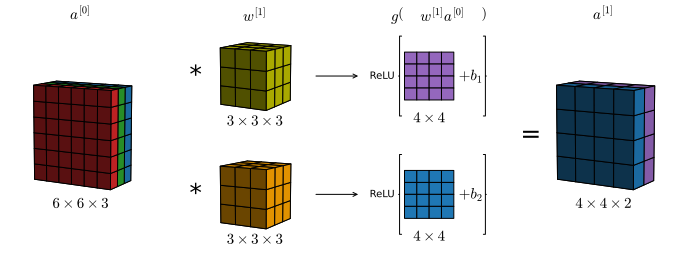

In [2]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[:, 3], projection='3d')

ax4 = fig.add_subplot(gs[:, 0], projection='3d')
ax5 = fig.add_subplot(gs[0, 1], projection='3d')
ax6 = fig.add_subplot(gs[1, 1], projection='3d')
out = np.array(list(' '*16)).reshape(4, 4)
ax3.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0))
tabs =  []
tabs.append(ax1.table(out, loc='center', cellColours=np.array(['C4']*16).reshape(4, 4)))
tabs.append(ax2.table(out, loc='center', cellColours=np.array(['C0']*16).reshape(4, 4)))

x, y, z = np.indices((4, 2, 4))
l1 = (x >= 0) & (y == 0) & (z >= 0)
l2 = (x >= 0) & (y == 1) & (z >= 0)
voxels = l1 | l2
colors = np.empty(voxels.shape, dtype=object)
colors[l1] = 'C4'
colors[l2] = 'C0'
ax3.voxels(voxels, edgecolor='k', facecolors=colors)
ax3.set_box_aspect([4, 2, 4])
ax3.view_init(elev=10, azim=120)
ax3.set_axis_off()
ax3.text2D(0.5, 0, '$ 4 \\times 4 \\times 2$', fontsize=15, transform=ax3.transAxes, ha='center')
ax3.text2D(0, 0.5, '=', fontsize=25, transform=ax3.transAxes, ha='center', va='center')


x, y, z = np.indices((6, 3, 6))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
ax4.voxels(voxels, edgecolor='k', facecolors=colors)
ax4.set_box_aspect([6, 3, 6])
ax4.view_init(elev=10, azim=120)
ax4.set_axis_off()
ax4.text2D(0.5, 0, '$ 6 \\times 6 \\times 3$', fontsize=15, transform=ax4.transAxes, ha='center')

x, y, z = np.indices((3, 3, 3))
voxels = (x >= 0) & (y >=0) & (z >= 0)
colors = np.full_like(voxels, 'y', dtype=object)
ax5.voxels(voxels, edgecolor='k', facecolors=colors)
ax5.set_box_aspect([3, 3, 3])
ax5.view_init(elev=10, azim=120)
ax5.set_axis_off()
ax5.text2D(0.5, 0, '$3 \\times 3 \\times 3$', transform=ax5.transAxes, fontsize=15, ha='center')
ax5.text2D(-.1, 0.5, '*', transform=ax5.transAxes, fontsize=25, va='center', ha='center')
ax5.annotate('', (1.1, 0.5), (-.2, 0.5), xycoords=ax5.transAxes, textcoords=ax1.transAxes, arrowprops=dict(arrowstyle='<-'))

x, y, z = np.indices((3, 3, 3))
voxels = (x >= 0) & (y >=0) & (z >= 0)
colors = np.full_like(voxels, 'orange', dtype=object)
ax6.voxels(voxels, edgecolor='k', facecolors=colors)
ax6.set_box_aspect([3, 3, 3])
ax6.view_init(elev=10, azim=120)
ax6.set_axis_off()
ax6.text2D(0.5, 0, '$3 \\times 3 \\times 3$', transform=ax6.transAxes, fontsize=15, ha='center')
ax6.text2D(-.1, 0.5, '*', transform=ax6.transAxes, fontsize=25, va='center', ha='center')
ax6.annotate('', (1.1, 0.5), (-.2, 0.5), xycoords=ax6.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))

for i, (tab, ax) in enumerate(zip(tabs, [ax1, ax2]), 1):
    tab.scale(0.5, 1)
    ax.set_aspect('equal')
    ax.annotate('ReLU', (-.1, 0.5), (-.2, 0.5), textcoords=tab, xycoords=tab, ha='right', va='center', arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2'))
    ax.annotate('', (1.6, 0.5), (1.7, 0.5), textcoords=tab, xycoords=tab, ha='right', va='center', arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2'))
    ax.text(0.8, 0.5, '$+b_{}$'.format(i), fontsize=15, va='center')
    ax.text(0.5, 0, '$4 \\times 4$', va='bottom', ha='center', fontsize=15)
    ax.set_axis_off()

ax4.text2D(0.5, 1.3, '$a^{[0]}$', transform=ax4.transAxes, fontsize=15, ha='center')
ax5.text2D(0.5, 1.06, '$w^{[1]}$', transform=ax5.transAxes, fontsize=15, ha='center')
ax1.text(0.6, 1.06, '$g \\left(\\quad \\; w^{[1]}a^{[0]} \\quad \\; \\right )$', transform=ax1.transAxes, fontsize=15, ha='center')
ax3.text2D(0.5, 1.3, '$a^{[1]}$', transform=ax3.transAxes, fontsize=15, ha='center');

<i id="fig:onelayercnn">A single layer of a convolutional neural network, with an input matrix $a^{[0]}$, convolved with two learned filters $w^{[1]}$ and the ReLU activation function applied to the two channels of the produced output images $g(w^{[1]}a^{[0]})$.</i>


In building one layer of a convolutional neural network, the input image, analogously to any neural network, can also be called $a^{[0]}$. The two filters play a similar role to the weights of the first layer of the neural network $w^{[1]}$. Each filter is multiplied and summed to the input image and produces a $4\times 4$ output, which is similar to $w^{[1]}a^{[0]}$. For each of these outputs, we can add a bias $b_i$, which is a single number $\in \mathbb{R}$ that is added to each cell of the output image. A non linearity function is applied to each output $g(w^{[1]}a^{[0]})$. Finally the two outputs are stacked together to generate the final output of one layer of a convolutional neural network $a^{[1]}$.

In the example in <a href="#fig:onelayercnn">the figure above</a> we have two filters and this is the reason why we end up with 2 channels in the output, but if instead we had for example 10 filters, we would have a $4 \times 4 \times 10$ output. Such a layer would have $3 \times 3 \times 3 + 1= 28$ parameters plus bias, multiplied $ \times 10$ for each filter, for a total of $280$ parameters for this layer. The nice thing about convolutional neural network, is that **number of parameters is independent from the size of the input image**. Even if the input image was a 1000 x 1000 pixels image, a layer such as what we have described, would still have 280 parameters. This means that with a very small number of parameters we can add filters for detecting a number of features of input images of any dimension. This property of convolutional neural networks make them **less prone to overfitting**.

### Notation for one convolutional layer

Notation for convolutional networks can be overwhelming, so to disambiguate from now on we will use the following notation. For one convolutional layer $l$:

One filter has dimension $f^{[l]}$

A convolution can have padding $p^{[l]}$ and stride $s^{[l]}$

The input of layer $l$ is $n_H^{[l-1]} \times n_W^{[l-1]} \times n_c^{[l-1]}$, where

* $H$ and $W$ are the height and width respectively
* $[l-1]$ indicates that the input is the activation values coming from the previous layer 
* $n_c$ is the number of channels in the previous layer

The output $a^{[l]}$ is $n_H^{[l]} \times n_W^{[l]} \times n_c^{[l]}$ where

* $n_H^{[l]} = \left \lfloor \frac{n_H^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1 \right \rfloor$ 
* $n_W^{[l]} = \left \lfloor \frac{n_W^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1 \right \rfloor$
* $n_c^{[l]}$ is the number of filters

Each filter has size $f^{[l]} \times f^{[l]} \times n_c^{[l-1]}$

Output for single examples $a^{[l]}_i$ are combined in a matrix $A^{[l]}$ with dimensions $m \times n_H^{[l]} \times n_W^{[l]} \times n_c^{[l]}$

Weights from all filters combined have dimensions $f^{[l]} \times f^{[l]} \times n_c^{[l-1]} \times n_c^{[l]}$

The bias will be a number for each filter, so a vector of $n_c^{[l]}$ elements

## Simple convolutional network
Suppose we want to build a classifier that is able to recognize if an input image is the picture of a cat (<a href="#fig:cnn">figure below</a>). For the sake of this example we will use small input images with dimensions: $39 \times 39 \times 3$. By convolving 10 $3 \times 3 \times 3$ filters with *valid* padding and stride $s^{[1]}=1$, we will obtain an output $a^{[1]} \in 37 \times 37 \times 10$.

A second convolutional layer with 20 $3\times 3 \times 3$ filters with *valid* padding and stride $s^{[2]}=2$ will give $a^{[2]} \in 17 \times 17 \times 20$. And a further layer with 40 $3 \times 3 \times 3$ filters with *valid* padding and stride $s^{[3]}=2$ will give an output $a^{[3]} \in 7 \times 7 \times 40$.

The last output layer $a^{[3]}$ can be reshaped into a $1960 \times 1$ array and fed into a logistic and softmax activation function to obtain the prediction $\hat{y}$.

In [3]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 5)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4])

x, y, z = np.indices((39, 3, 39))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
ax1.voxels(voxels, edgecolor='k', facecolors=colors, linewidth=0.1)
ax1.set_title('$x$', fontsize=15)
ax1.set_box_aspect([39, 10, 39])
ax1.text2D(0.5, 0, '$ 39 \\times 39 \\times 3$\n$n_H^{[0]}=n_W^{[0]}=39$\n$n_c^{[0]}=3$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((37, 10, 37))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax2.set_box_aspect([37, 25, 37])
ax2.set_title('$a^{[1]}$', fontsize=15)
ax2.text2D(0.5, 0, '$ 37 \\times 37 \\times 10$\n$n_H^{[0]}=n_W^{[0]}=37$\n$n_c^{[0]}=10$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

x, y, z = np.indices((17, 20, 17))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax3.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax3.set_box_aspect([17, 35, 17])
ax3.set_title('$a^{[2]}$', fontsize=15)
ax3.text2D(0.5, 0, '$ 17 \\times 17 \\times 20$\n$n_H^{[0]}=n_W^{[0]}=17$\n$n_c^{[0]}=20$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

x, y, z = np.indices((7, 40, 7))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax4.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax4.set_box_aspect([7, 50, 7])
ax4.set_title('$a^{[3]}$', fontsize=15)
ax4.text2D(0.5, 0, '$ 7 \\times 7 \\times 40$\n$n_H^{[0]}=n_W^{[0]}=7$\n$n_c^{[0]}=40$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ann([5, 1], ax=ax5, radius=2.5, node_labels=['$a^{[3]}_1$', '$a^{[3]}_2$', '$a^{[3]}_3$', '$\\vdots$', '$a^{[3]}_{1960}$', '$\\hat{y}$'], node_colors=list('kkkwk'), edge_colors=list('kkkwk'))
ax5.set_title('$a^{[4]}$', fontsize=15)
ax5.text(0.5, 0, '$ 1960 \\times 1$\n$\\mathrm{logistic/}$\n $\\mathrm{softmax}$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')
ax5.set_aspect('equal')

w1 = plt.annotate('', (1, 0.5), (0, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f^{[1]}=3$\n$s^{[1]}=1$\n$p^{[1]}=0$\n$10 \\mathrm{ filters}$', xy=(0, 0), xytext=(0.5, -.1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (1, 0.5), (0, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f^{[2]}=5$\n$s^{[2]}=2$\n$p^{[2]}=0$\n$20 \\mathrm{ filters}$', xy=(0, 0), xytext=(0.5, -.1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (1, 0.5), (0, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f^{[3]}=5$\n$s^{[3]}=2$\n$p^{[3]}=0$\n$40 \\mathrm{ filters}$', xy=(0, 0), xytext=(0.5, -.1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (1, 0.5), (0, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.view_init(elev=10, azim=120)
    ax.set_axis_off()

<i id="fig:cnn">A simple convolutional neural network with 3 convolutional layers and one final dense layer.</i>

As shown in this example, the typical trend of a convolutional neural network is that the width and height of the activation matrices will generally shrink, while the number of channels will generally grow as we advance deeper in the network. At each convolutional step, the values $f^{[l]}, s^{[l]}, p^{[l]}$ add themselves to the list of hyperparameters that need to be set. Different values of these hyperparameters can give fundamentally different results.

## Types of layer in a convolutional network
In a typical convolutional network there are usually three types of layer:

* Convolutional layer (CONV): this is the type of layer that we just described 
* Fully or densely connected layer (FC): a layer of a classic neural network
* Pooling layer (POOL)

Although it is possible to design good neural networks that just use CONV layers, most architectures will use combinations of the three.

### Pooling layers
Pooling layers are used to reduce the size of the representation, to speed up the computation as well as make the features detected more robust.
A pooling layer is a layer that performs an operation on a window of cells of dimensions $f \times f$. In **Max pooling** for example, the operation is taking the max value of the value in the $f \times f$ window (<a href="fig:maxpool">figure below</a>). A max pooling Layer operates independently on every channel of the input and shrinks it in the height and width dimension but preserving the number of channels.

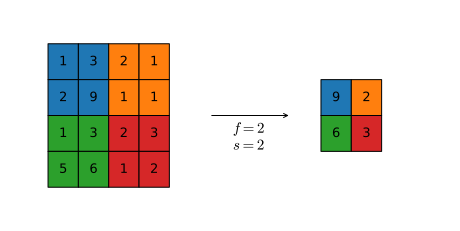

In [4]:
canvas = [[1,3,2,1],[2,9,1,1],[1,3,2,3],[5,6,1,2]]
kernel = [[9,2],[6,3]]
canvascol = np.array([f'C{i}' for i in '0011001122332233']).reshape(4,4)
kernelcol = np.array([f'C{i}' for i in '0123']).reshape(2,2)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = axes.ravel()
fig.patch.set_visible(False)

tabs = []
tabs.append(ax1.table(canvas, loc='center', colWidths=[0.05]*4, cellLoc='center', cellColours=canvascol))
tabs.append(ax2.table(kernel, loc='center', colWidths=[0.05]*2, cellLoc='center', cellColours=kernelcol))
an = plt.annotate('', (0.2, 0.5), (1, 0.5), xycoords=ax2.transAxes, textcoords=ax1.transAxes, arrowprops=dict(arrowstyle='->'))
plt.annotate('$f=2$\n$s=2$', (0, 0), (0.5, -1), xycoords=an, fontsize=15, va='top', ha='center')


for ax, tab in zip(axes.ravel(), tabs):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')

<i id="fig:maxpool">Max pooling on a $4 \times 4$ input with a $2\times 2$ window with stride $s=2$</i>

The intuition behind max pooling is to preserve the feature detected in the input feature, which should be represented by high values in the input, while reducing the dimension of the image. Despite this the widely accepted intuition of max pooling, to the best of my knowledge I don't know if anyone knows if this intuition is the real underlying reason why max-pooling woks well.

Other kinds of pooling exist, as for example **average pooling** that takes the average of a window. There are two typical version of pooling layers: the most common is $f=2,s=2$; also $f=2,s=3$, sometimes called overlapping pooling, is found. Pooling layers have two hyperparameters ($f,s$), but don't have learned parameters. For this reason pooling layers are sometimes not counted as layers on their own, but only associated to a CONV layer.

## LeNet - A CNN example
The first working implementation of a CNN is LeNet, published 1990. LeNet-5 was designed as shown in <a href="#fig:lenet5">the picture below</a>. LeNet has a typical architecture for convolutional networks. With a CONV and a POOL layer the alternate. Deeper convolutional layers shrink in width and height and grow in channels. The last layers of the network are fully connected (FC) and the network terminates with the output layer, that contains as many units as the output classes, a softmax layer with 10 units in this case.

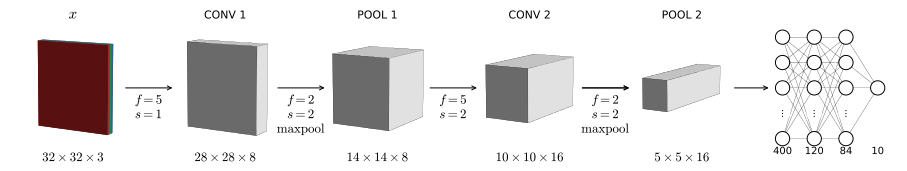

In [5]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 6)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4], projection='3d')
ax6 = fig.add_subplot(gs[0, 5])

x, y, z = np.indices((1, 3, 1))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
ax1.voxels(voxels, edgecolor='none', facecolors=colors, linewidth=0)
ax1.set_title('$x$', fontsize=15)
ax1.set_box_aspect([32, 4, 32])
ax1.text2D(0.5, 0, '$ 32 \\times 32 \\times 3$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax2.set_box_aspect([28, 8, 28])
ax2.set_title('CONV 1', fontsize=11)
ax2.text2D(0.5, 0, '$ 28 \\times 28 \\times 8$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

ax3.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax3.set_box_aspect([14, 16, 14])
ax3.set_title('POOL 1', fontsize=11)
ax3.text2D(0.5, 0, '$ 14 \\times 14 \\times 8$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

ax4.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax4.set_box_aspect([10, 20, 10])
ax4.set_title('CONV 2', fontsize=11)
ax4.text2D(0.5, 0, '$ 10 \\times 10 \\times 16$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ax5.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax5.set_box_aspect([5, 20, 5])
ax5.set_title('POOL 2', fontsize=11)
ax5.text2D(0.5, 0, '$ 5 \\times 5 \\times 16$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')


ann([5, 5, 5, 1], ax=ax6, radius=2.5, node_labels=[*[*'   ', '$\\vdots$', ' ']*3], node_colors=list('kkkwk')*3, edge_colors=list('kkkwkkkkwkkkkwkwwwwwkkkwk'*3), layer_labels=[400, 120, 84, 10])
ax6.set_aspect('equal')

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=5$\n$s=1$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=5$\n$s=2$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=13)
w5 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
w5 = plt.annotate('', (.9, 0.5), (0, 0.5), xycoords=ax5.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.view_init(elev=10, azim=120)
    ax.set_axis_off()

<i id="fig:lenet5">Approximate architecture on LeNet-5 convolutional neural network</i>

By looking at the number of parameters in the different layers, we can notice how convolutional layers have very few parameters and very large activation size, while fully connected layers have typically smaller activation size and large number of parameters.

In [6]:
ashape = [(32, 32, 3), (28, 28, 8), (14, 14, 8), (10, 10, 16), (5, 5, 16), (120, 1), (84, 1), (10, 1)]
asize = [np.prod(s) for s in ashape]
params = [0, 208, 0, 416, 0, 48001, 10801, 841]
pd.DataFrame(list(zip(*[ashape, asize, params])), 
             index=['Input', 'CONV1 (f=5, s=1)', 'POOL1', 'CONV2 (f=5, s=1)', 'POOL2', 'FC3', 'FC4', 'Softmax'], 
             columns=['Activation shape', 'Activation size', '# parameters']).style.set_caption('Architecture parameters and sizes of the LeNet-5')